In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/202122-nba-season-active-nba-players/players.csv
/kaggle/input/202122-nba-season-active-nba-players/active_players_2.csv


In [2]:
import seaborn as sns

import sklearn


%matplotlib inline

In [3]:
# Open the csv file with pandas
df = pd.read_csv("/kaggle/input/202122-nba-season-active-nba-players/active_players_2.csv")

In [4]:
# Understanding the datasets
print(df.keys())
print("type = ", type(df))
print("\n")
print(df.describe())
print("\n")
print(df["Name"])
print("\n")
print(df.head())

Index(['Name', 'Team', 'Position', 'Age', 'Height', 'Height_i', 'Weight',
       'College', 'Salary'],
      dtype='object')
type =  <class 'pandas.core.frame.DataFrame'>


              Age    Height_i      Weight        Salary
count  558.000000  558.000000  558.000000  4.450000e+02
mean    25.543011    6.492151  216.163082  8.813696e+06
std      4.318651    0.335012   24.573787  9.886777e+06
min     18.000000    5.100000  160.000000  9.252580e+05
25%     22.000000    6.200000  199.250000  1.802057e+06
50%     25.000000    6.500000  215.000000  4.447896e+06
75%     28.000000    6.700000  233.000000  1.200000e+07
max     41.000000    7.500000  311.000000  4.578097e+07


0        Juhann Begarin
1          Jaylen Brown
2             Kris Dunn
3        Carsen Edwards
4            Tacko Fall
             ...       
553        Juwan Morgan
554       Royce O'Neale
555         Olumiye Oni
556       Eric Paschall
557    Hassan Whiteside
Name: Name, Length: 558, dtype: object


             Nam

In [5]:
# Getting all distinct player-positions in the game
df['Position']
positions = []
for pos in df['Position']:
    if pos not in positions:
        positions.append(pos)
print(positions)

['SG', 'PG', 'C', 'F', 'SF', 'PF', 'G']


In [6]:
'''
carry = df["Height"][0].strip("\'\"").split("\' ")
res = int(carry[0])*12 + int(carry[1])
print(res)
'''

lst = []

for elem in df["Height"]:
    carry = elem.strip("\'\"").split("\' ")
    res = int(carry[0])*12 + int(carry[1])
    lst.append(res)
    
df["Height_converted"] = lst
df["Weight"].loc[0:10]
print((round)(0.7*len(df)))


391


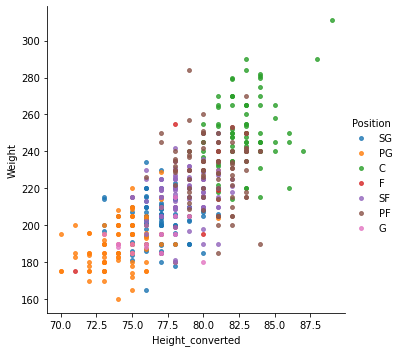

In [7]:
sns.lmplot(x='Height_converted', y='Weight', data=df, fit_reg=False, hue='Position',scatter_kws={"s": 15})

# There is a correlation between a player's height and weight, and the position they play.

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
#pos = ["SG", "PG", "C", "F", "SF", "PF", "G"]
pos = ["PG", "G", "SG", "SF", "PF", "F", "C" ]
position_lst = []

for elem in df["Position"]:
    for i in range(len(pos)):
        if elem == pos[i]:
            position_lst.append(i)

df["Position_converted"] = position_lst
    

In [10]:
# split the data set into 70% training and 30% testing

training_X = df[["Height_converted","Weight"]].iloc[0:((round)(0.7*len(df)))]
training_y = df["Position_converted"].iloc[0:((round)(0.7*len(df)))]

testing_X = df[["Height_converted","Weight"]].iloc[0:(len(df)-((round)(0.7*len(df))))]
testing_y = df["Position_converted"].iloc[0:(len(df)-((round)(0.7*len(df))))]

In [11]:
neigh = KNeighborsRegressor(n_neighbors=5)

In [12]:
X = df[["Height_converted","Weight"]]
y = df["Position_converted"]

neigh.fit(training_X, training_y)


KNeighborsRegressor()

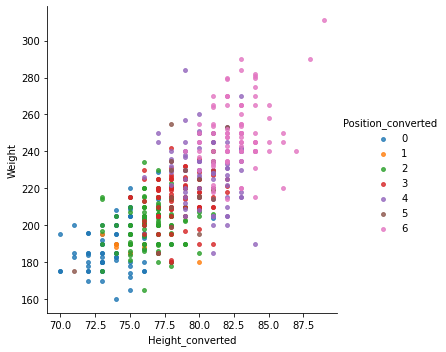

In [13]:
sns.lmplot(x='Height_converted', y='Weight', data=df, fit_reg=False, hue='Position_converted',scatter_kws={"s": 15})


In [14]:
#print((neigh.predict([[79, 232]])).round())

# Testing the accuracy

print(testing_X.iloc[0])

tot = 0
#tot+= neigh.predict([[testing_X.iloc[0][0], testing_X.iloc[0][1]]]).round()

for i in range(len(testing_X)):
    if (testing_y.iloc[i]-1 <= neigh.predict([[testing_X.iloc[i][0], testing_X.iloc[i][1]]]).round() and  neigh.predict([[testing_X.iloc[i][0], testing_X.iloc[i][1]]]).round()) <= testing_y.iloc[i]+1:
        tot+=1
print(tot/len(testing_X))


Height_converted     77
Weight              185
Name: 0, dtype: int64


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


0.9401197604790419


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


In [15]:
df

,Name,Team,Position,Age,Height,Height_i,Weight,College,Salary,Height_converted,Position_converted
0,Juhann Begarin,Boston Celtics,SG,19,"6' 5""",6.50,185,NaN,NaN,77,2
1,Jaylen Brown,Boston Celtics,SG,24,"6' 6""",6.60,223,California,26758928.0,78,2
2,Kris Dunn,Boston Celtics,PG,27,"6' 3""",6.30,205,Providence,5005350.0,75,0
3,Carsen Edwards,Boston Celtics,PG,23,"5' 11""",5.11,200,Purdue,1782621.0,71,0
4,Tacko Fall,Boston Celtics,C,25,"7' 5""",7.50,311,UCF,NaN,89,6
...,...,...,...,...,...,...,...,...,...,...,...
553,Juwan Morgan,Utah Jazz,SF,24,"6' 7""",6.70,232,Indiana,NaN,79,3
554,Royce O'Neale,Utah Jazz,PF,28,"6' 4""",6.40,226,Baylor,8800000.0,76,4
555,Olumiye Oni,Utah Jazz,SG,24,"6' 5""",6.50,206,Yale,1782621.0,77,2
556,Eric Paschall,Utah Jazz,F,24,"6' 6""",6.60,255,Villanova,1782621.0,78,5
